In [1]:
###################################################
### This file is part of numsimqubits.          ###
###                                             ###    
### Copyright (c) 2020 and later, Andras Gyenis ###
### All rights reserved.                        ###
###################################################

# Importing packages, modules.

import sys
sys.path.append('../')
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display, Image, Markdown

import numsimqubits.qubits as nsq
from matplotlib.ticker import AutoMinorLocator
from qutip import Qobj

import numsimqubits.qubits.settings as sim_settings
sim_settings.update()

In [2]:
# Create the fluxonium object in phase basis.
fluxonium = nsq.Fluxonium(                      
                          E_J          = 8.,                         # Josephson energy [GHz]
                          E_C          = 0.5,                        # charging energy [GHz]
                          E_L          = 0.2,                        # inductive energy [GHz]
                          phi_ext      = 0.,                         # external flux
                          phi_ext_ls   = np.linspace(-0.5, 0.5, 51), # external flux to sweep
                          keig         = 20,                         # number of states to calculate
                          phase_limits = [6*np.pi],                  # boundaries of phase space
                          dims         = [301],                      # number of points in phase space
                          beta         = [0.1],                      # coupling constant for a coupled transmon-resonator case
                          f_resonator  = 7.                          # frequency of the coupled resonator [GHz]
                         )



In [3]:
# Diagonalize the Hamiltonian in the phase basis as a function of 'phi_ext' variable.

fluxonium.sweep_diagonalize(sweep_variable='phi_ext')

100%|██████████| 51/51 [00:00<00:00, 58.37it/s]


<IPython.core.display.Javascript object>


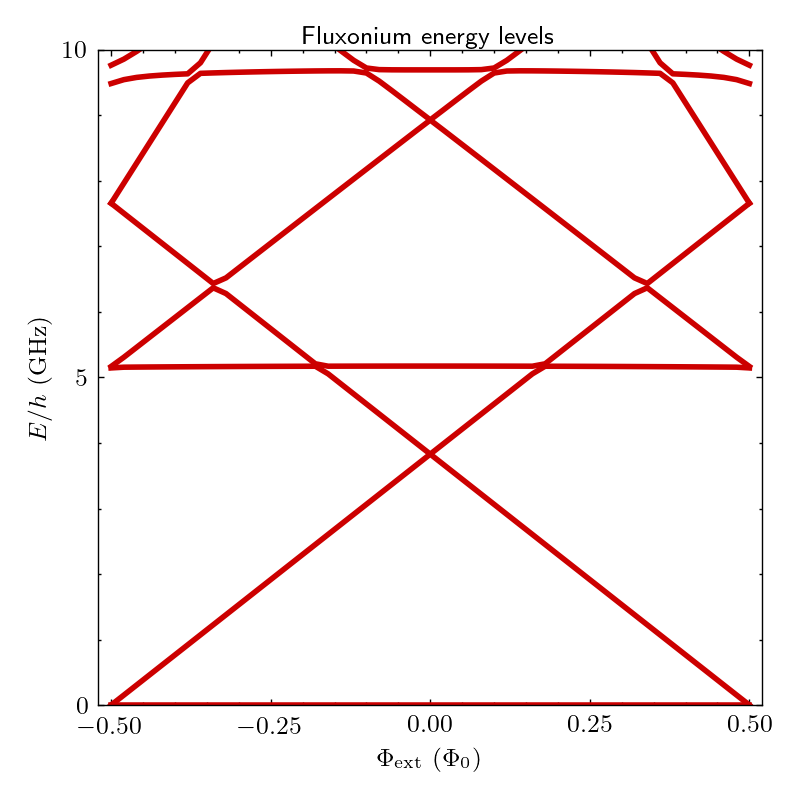

In [4]:
# Plot the energy disperion based on both the charge and phase representation.

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(10):
    ln1, = ax.plot(fluxonium.phi_ext_ls, fluxonium.evals[:,level_idx], 
                   linewidth=2.0, color=[0.8,0,0])

ax.set_xlim([-0.52, 0.52])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$\Phi_\mathrm{ext}\ (\Phi_0)$')

ax.set_ylim([0, 10])
ax.set_yticks([0,5,10])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$E/h\ (\mathrm{GHz})$')

ax.set_title('Fluxonium energy levels')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


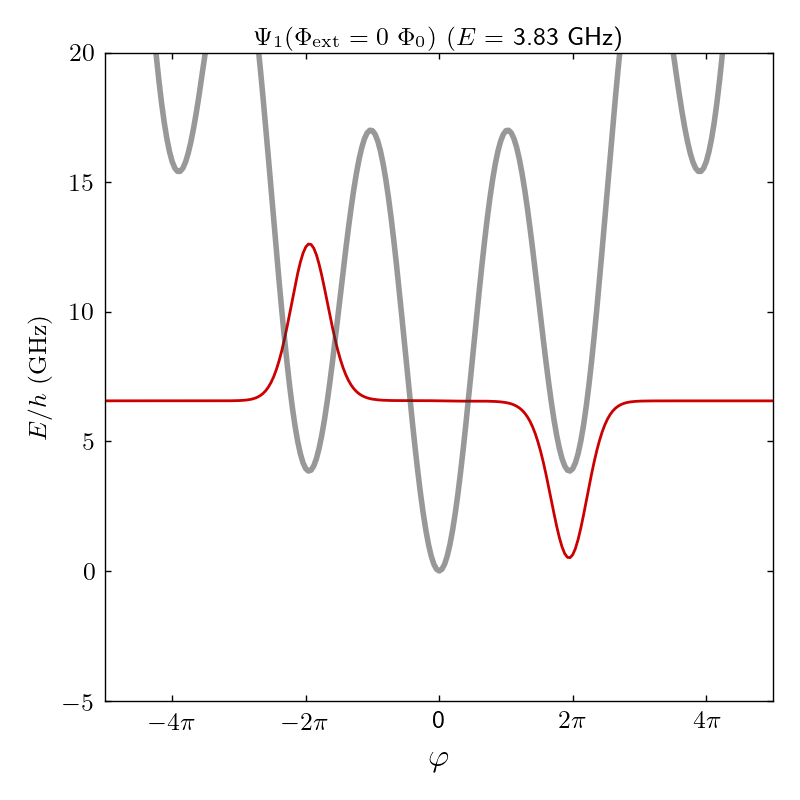

In [5]:
# Plot the wavefunction at a certain flux value

n_level           = 1 # energy level
fluxonium.phi_ext = 0 # external flux

results         = fluxonium.diagonalize()
axis_phase      = fluxonium.axis[0]
energy          = results['evals'][n_level]
zero_energy     = results['zero_energy']
eket_phase      = results['ekets'][n_level]
potential_phase = results['V']

fig, ax = plt.subplots(figsize=(4,4))

ax.plot(axis_phase, -np.real(eket_phase) * 30 + energy + zero_energy, linewidth = 1.0, color=[0.8,0,0])
ax.plot(axis_phase, potential_phase, linewidth = 2, color = [0.2,0.2,0.2], alpha = 0.5)

ax.set_xlim([-5*np.pi, 5*np.pi])
ax.set_xticks([-4*np.pi, -2*np.pi, 0, 2*np.pi, 4*np.pi])
ax.set_xticklabels([r"${-4\pi}$", r"${-2\pi}$", "0", r"${2\pi}$", r"${4\pi}$"])
ax.set_xlabel(r'$\varphi$', fontsize=12)

ax.set_ylim([-5, 20])
ax.set_ylabel(r'$E/h\ (\mathrm{GHz})$')

ax.set_title(r'$\Psi_{%s}(\Phi_\mathrm{ext} = %s\ \Phi_0) \ (E$ = %s GHz)' %(n_level, fluxonium.phi_ext, np.round(energy,3)))

plt.tight_layout()
plt.show()

In [6]:
# Diagonalize the Hamiltonian in the phase basis and extract matrix elements as a function of 'phi_ext' variable.

fluxonium.sweep_diagonalize(sweep_variable='phi_ext', calculate_mx_elements=True)

100%|██████████| 51/51 [00:01<00:00, 34.52it/s]


<IPython.core.display.Javascript object>


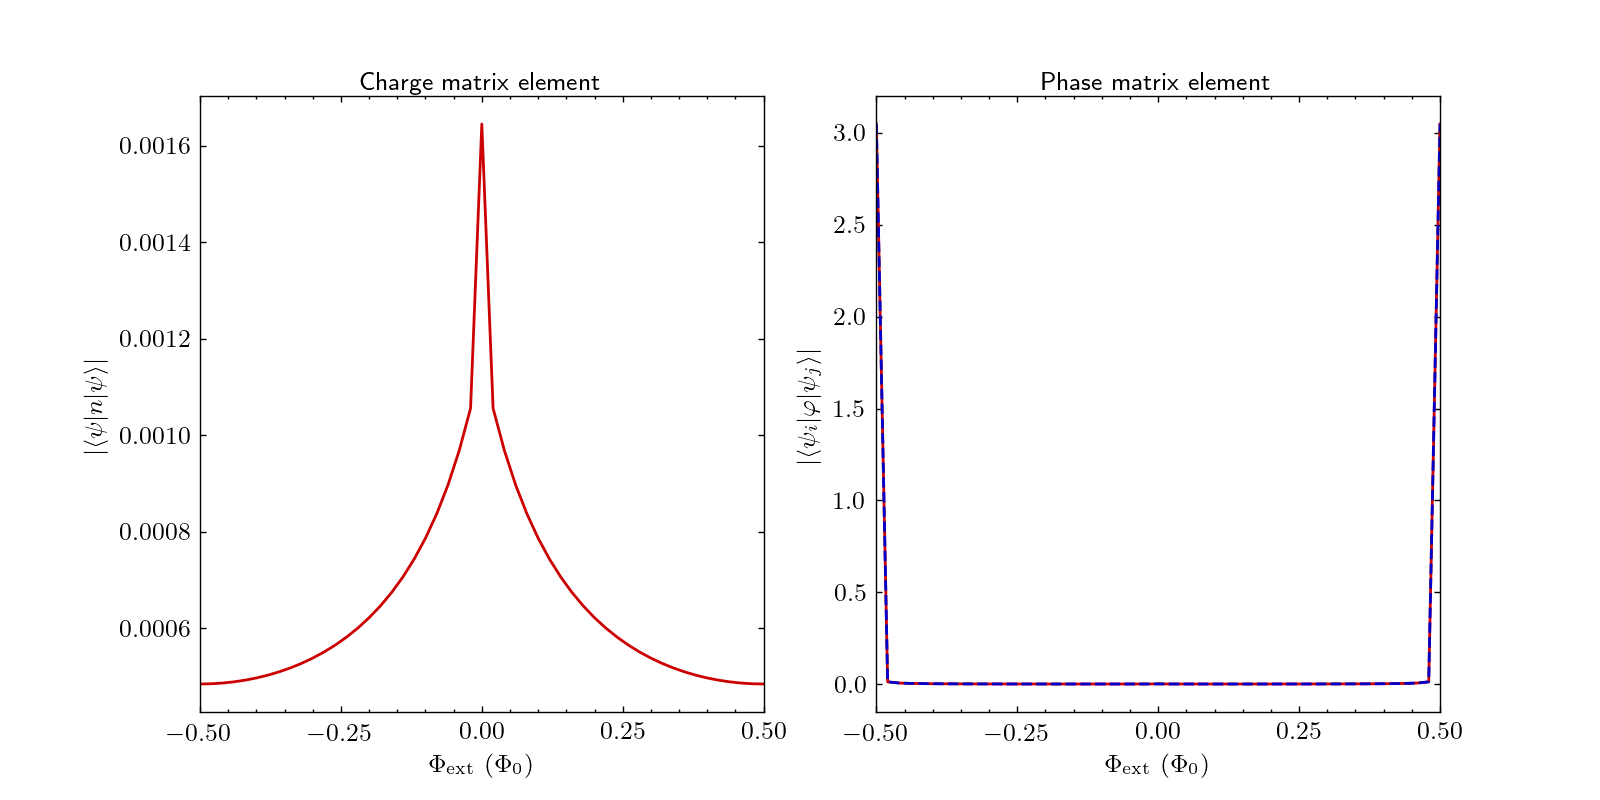

In [8]:
## Plot matrix elements as a function of flux

# Plot the matrix element between level i and j at a given gate value.

idx_level_i = 0 # energy level i
idx_level_j = 1 # energy level j

conversation_factor = 8 * fluxonium.E_C # conversion between phase and charge matrix element

fig, axs = plt.subplots(figsize=(8,4), nrows=1, ncols=2)

axs[0].plot(fluxonium.phi_ext_ls, np.abs(fluxonium.n[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])

axs[0].set_ylabel(r'$|\langle\psi|n|\psi\rangle|$')
axs[0].set_title('Charge matrix element')

axs[1].plot(fluxonium.phi_ext_ls, np.abs(fluxonium.phi[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])

axs[1].plot(fluxonium.phi_ext_ls, 
        conversation_factor / (fluxonium.evals[:,idx_level_j] - fluxonium.evals[:,idx_level_i]) * np.abs(fluxonium.n[:,idx_level_i,idx_level_j]),
        '--', linewidth = 1.0, color=[0,0,0.8])

axs[1].set_ylabel(r'$|\langle\psi_i|\varphi|\psi_j\rangle|$')
axs[1].set_title('Phase matrix element')

for i in range(2):
    axs[i].set_xlim([-0.5, 0.5])
    axs[i].set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
    axs[i].xaxis.set_minor_locator(AutoMinorLocator(5))
    axs[i].set_xlabel(r'$\Phi_\mathrm{ext}\ (\Phi_0)$')

plt.show()

In [9]:
# Plot the wavefunction at a certain flux and charge value
n_level_a         = 1 # energy level
n_level_b         = 0 # energy level
fluxonium.phi_ext = 0. # external flux

results     = fluxonium.diagonalize(calculate_mx_elements=True)
energy_a    = results['evals'][n_level_a]
energy_b    = results['evals'][n_level_b]
energy      = np.abs(energy_a - energy_b)
g           = np.abs(results['g'][n_level_a][n_level_b])
chi         = np.abs(results['chi'][n_level_a]-results['chi'][n_level_b])

display(Markdown('$\omega_{%s}/2\pi = $ %.3f GHz' % (n_level_a, energy_a)))
display(Markdown('$\omega_{%s}/2\pi = $ %.3f GHz' % (n_level_b, energy_b)))
display(Markdown('$\Delta\omega/2\pi = $ %.3f MHz' % (energy*1e3)))
display(Markdown('$g_{%s%s}/2\pi = $ %.3f MHz' % (n_level_a, n_level_b, g*1e3)))
display(Markdown('$\chi_{%s%s}/2\pi = $ %.2f MHz' % (n_level_a, n_level_b,chi*1e3)))

$\omega_{1}/2\pi = $ 3.830 GHz

$\omega_{0}/2\pi = $ 0.000 GHz

$\Delta\omega/2\pi = $ 3830.165 MHz

$g_{10}/2\pi = $ 0.143 MHz

$\chi_{10}/2\pi = $ 0.16 MHz

In [10]:
# Diagonalize the coupled Hamiltonian and resonator in phase basis as a function of 'phi_ext' variable.

fluxonium.sweep_diagonalize_full_Hamiltonian('phi_ext')


100%|██████████| 51/51 [00:01<00:00, 46.76it/s]


<IPython.core.display.Javascript object>


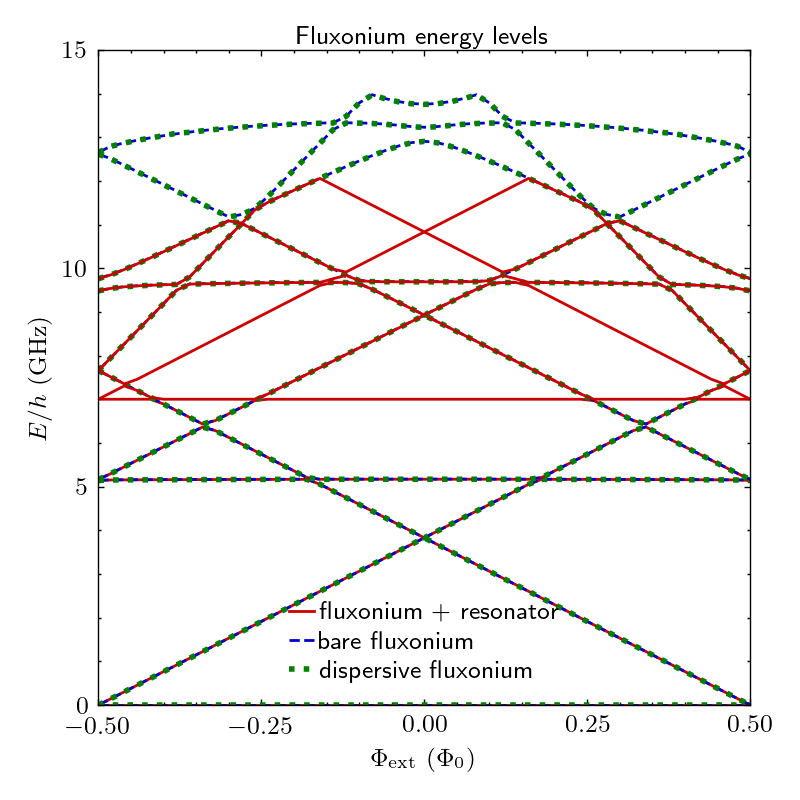

In [11]:
# Plot and compare the energy levels obtained from the bare transmon Hamiltonian,
# the dispersive Hamiltonian, and the full coupled transmon + resonator Hamiltonian.

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(10):
    ln1, = ax.plot(fluxonium.phi_ext_ls, fluxonium.evals_full[:,level_idx], 
                   '-', linewidth=1.0, color = [0.8,0,0], label = 'fluxonium + resonator')
    ln2, = ax.plot(fluxonium.phi_ext_ls, fluxonium.evals[:,level_idx], 
                   '--', linewidth=1.0, color = [0,0,0.8], label = 'bare fluxonium')
    ln3, = ax.plot(fluxonium.phi_ext_ls, fluxonium.evals[:,level_idx] + fluxonium.kappa[:,level_idx], 
                   ':', linewidth=2.0, color = [0,0.5,0], label = 'dispersive fluxonium')

ax.set_xlim([-0.5, 0.5])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$\Phi_\mathrm{ext}\ (\Phi_0)$')

ax.set_ylim([0, 15])
ax.set_yticks([0,5,10,15])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$E/h\ (\mathrm{GHz})$')

ax.set_title('Fluxonium energy levels')

ax.legend(handles = [ln1, ln2, ln3])

plt.tight_layout()
plt.show()